# MPB Demo for 18.369

Here, we demonstrate running [MPB](http://ab-initio.mit.edu/wiki/index.php/MIT_Photonic_Bands) for the MIT course [18.369](http://math.mit.edu/~stevenj/18.369/).  MPB computes dispersion
relations (band structures) $\omega(\vec{k})$ for arbitrary periodic dielectric structures,
from photonic crystals to optical fibers and other dielectric waveguides.

This is an [IJulia notebook](https://github.com/JuliaLang/IJulia.jl), which provides a nice
browser-based [Jupyter](http://jupyter.org/) interface to the [Julia language](http://julialang.org/), a high-level dynamic language (similar to Matlab or Python+SciPy) for technical computing.  The notebook allows us to combine code and results in one place.

Julia has the advantage of being as fast as C (unlike Matlab/Python, where all your "inner loops" must occur in external libraries).  Performance is not really relevant in this particular notebook, where all the serious computation occurs in MPB, but it's a nice language
anyway and I've gotten in the habit of using Julia as much as possible so that the performance is there when I run into a case that really needs it.

## 2d dielectric waveguide

Our first example is based on the file `2dwaveguide.ctl` provided on the 18.369 web site, which computes the dispersion relation and eigenfunctions of a width=1 ($a$) waveguide of $\varepsilon=12$ in air.

In [1]:
# change directories to location of ctl files and data
# ... edit as needed on your machine
cd("/Users/stevenj/Documents/Code/mpb/18.369")

Let me assume you are running on a machine with `mpb` installed.  It is pre-installed on MIT Athena machines, and is easy to install on Ubuntu Linux with `apt-get install mpb`.  To install it on Mac or Windows, you need to know how to compile/install Unix software.

At the shell, we would normally run `mpb "2dwaveguide.ctl" > 2dwaveguide.out`, but we can also do this directly from Julia with the `run` and `pipeline` functions.

In [2]:
run(pipeline(`mpb "2dwaveguide.ctl"`, "2dwaveguide.out"))

The `2dwaveguide.out` file is now a dump of all the output from the `mpb` run, basically a log of the computational process.   Intermingled in this output are a sequence of lines beginning with prefixes like `freqs:, ` which contain comma-delimited text of the dispersion-relation data.

To pull out this data at a Unix command-line, the easiest thing is to use the `grep` command (which extracts lines matching a certain pattern) combined with the `cut` command (to strip out the first "label" column, leaving only the columns of numbers).   For example, the output of the `(run-tm-yeven)` function in the `2dwaveguide.ctl` file, which computes the TM-polarized ($E_z$) bands that are even with respect to the $y=0$ mirror plane, are lines prefixed by `tmyevenfreqs:, ...`.  We can extract these to a file `tmyeven.dat` at the command line by `grep tmyevenfreqs: 2dwaveguide.out | cut -d, -f2- > tmyeven.dat`, or in Julia by:

In [3]:
run(pipeline(`grep tmyevenfreqs: 2dwaveguide.out`, `cut -d, -f2-`, "tmyeven.dat"))

# display the contents of the resultying `tmyeven.dat` file:
println(read("tmyeven.dat", String))

 k index, k1, k2, k3, kmag/2pi, tmyeven band 1, tmyeven band 2, tmyeven band 3, tmyeven band 4, tmyeven band 5
 1, 0, 0, 0, 0, 0, 0.0666843, 0.1644, 0.254929, 0.309555
 2, 0.181818, 0, 0, 0.181818, 0.0802232, 0.189731, 0.240054, 0.290685, 0.343467
 3, 0.363636, 0, 0, 0.363636, 0.132517, 0.321176, 0.368163, 0.401043, 0.457086
 4, 0.545455, 0, 0, 0.545455, 0.182865, 0.357951, 0.54811, 0.567974, 0.594108
 5, 0.727273, 0, 0, 0.727273, 0.233071, 0.394292, 0.62979, 0.729408, 0.74616
 6, 0.909091, 0, 0, 0.909091, 0.283486, 0.432334, 0.659186, 0.906575, 0.911458
 7, 1.09091, 0, 0, 1.09091, 0.334166, 0.47212, 0.689252, 0.937705, 1.09231
 8, 1.27273, 0, 0, 1.27273, 0.385093, 0.513456, 0.720919, 0.96409, 1.21965
 9, 1.45455, 0, 0, 1.45455, 0.436232, 0.556122, 0.754281, 0.99124, 1.24541
 10, 1.63636, 0, 0, 1.63636, 0.487548, 0.599922, 0.789256, 1.01969, 1.27022
 11, 1.81818, 0, 0, 1.81818, 0.539014, 0.644689, 0.825713, 1.04954, 1.29574
 12, 2, 0, 0, 2, 0.590603, 0.690282, 0.863513, 1.08078, 1.3223

Finally, we can read in this data as a matrix of numbers by the `readcsv` function in Julia (csv = [comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values)), where the `header=true` option means that it reads the first line as list of strings describing each column, followed by data on subsequent lines:

In [4]:
tmyeven, header = readcsv("tmyeven.dat", header=true)
println(header)
tmyeven

AbstractString[" k index" " k1" " k2" " k3" " kmag/2pi" " tmyeven band 1" " tmyeven band 2" " tmyeven band 3" " tmyeven band 4" " tmyeven band 5"]


12×10 Array{Float64,2}:
  1.0  0.0       0.0  0.0  0.0       …  0.1644    0.254929  0.309555
  2.0  0.181818  0.0  0.0  0.181818     0.240054  0.290685  0.343467
  3.0  0.363636  0.0  0.0  0.363636     0.368163  0.401043  0.457086
  4.0  0.545455  0.0  0.0  0.545455     0.54811   0.567974  0.594108
  5.0  0.727273  0.0  0.0  0.727273     0.62979   0.729408  0.74616 
  6.0  0.909091  0.0  0.0  0.909091  …  0.659186  0.906575  0.911458
  7.0  1.09091   0.0  0.0  1.09091      0.689252  0.937705  1.09231 
  8.0  1.27273   0.0  0.0  1.27273      0.720919  0.96409   1.21965 
  9.0  1.45455   0.0  0.0  1.45455      0.754281  0.99124   1.24541 
 10.0  1.63636   0.0  0.0  1.63636      0.789256  1.01969   1.27022 
 11.0  1.81818   0.0  0.0  1.81818   …  0.825713  1.04954   1.29574 
 12.0  2.0       0.0  0.0  2.0          0.863513  1.08078   1.32232 

Next, we can extract the $k_x$ wavevector from the 2nd column and the frequencies from the 6th and subsequent columns:

In [5]:
kx = tmyeven[:, 2]
ω_tme = tmyeven[:, 6:end]

12×5 Array{Float64,2}:
 0.0        0.0666843  0.1644    0.254929  0.309555
 0.0802232  0.189731   0.240054  0.290685  0.343467
 0.132517   0.321176   0.368163  0.401043  0.457086
 0.182865   0.357951   0.54811   0.567974  0.594108
 0.233071   0.394292   0.62979   0.729408  0.74616 
 0.283486   0.432334   0.659186  0.906575  0.911458
 0.334166   0.47212    0.689252  0.937705  1.09231 
 0.385093   0.513456   0.720919  0.96409   1.21965 
 0.436232   0.556122   0.754281  0.99124   1.24541 
 0.487548   0.599922   0.789256  1.01969   1.27022 
 0.539014   0.644689   0.825713  1.04954   1.29574 
 0.590603   0.690282   0.863513  1.08078   1.32232 

Now, let's plot the dispersion relation.  I'll use the [PyPlot](https://github.com/stevengj/PyPlot.jl) package in Julia, which is an interface to the sophisticated [matplotlib](http://matplotlib.org/) Python plotting library.   We'll plot three things:

* `plot(kx, ω_tme, "ro-")` will plot `ω_tme` vs `kx` as red dots connected by lines.
* `plot(kx, kx, "k-", linewidth=2)` will plot the light line in air $\omega=ck$ as a solid black line.
* `fill([0,2,0],[0,2,2], facecolor=(0.3,0.3,0.3), zorder=3)` will plot a gray triangle over the light cone.

Because MPB's calculation is technically a supercell, a periodic array of waveguides separated by a large distance, only the guided (localized) bands below the light line are accurate for an isolated waveguide.  (Because the guided modes are exponentially localized, they are not affected by the adjacent waveguides in MPB's artificially periodic supercell.)   That is why we typically ignore bands above the light line (which are not localized, and hence are messed up by the periodic boundary conditions in $y$) by covering them up with the light cone.

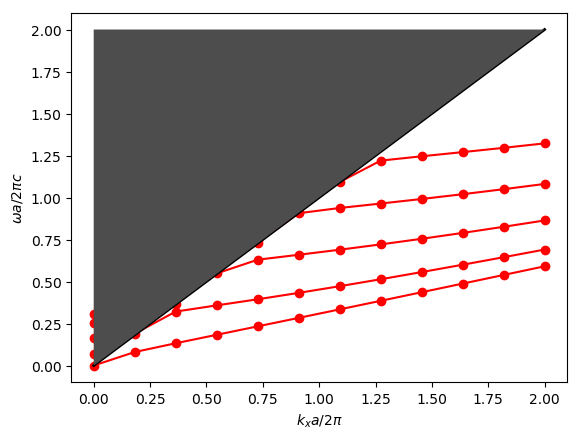

PyObject Text(25,0.5,'$\\omega a / 2\\pi c$')

In [6]:
using PyPlot
plot(kx, ω_tme, "ro-")
plot(kx, kx, "k-", linewidth=2)
fill([0,2,0],[0,2,2], facecolor=(0.3,0.3,0.3), zorder=3)
xlabel(L"k_x a / 2\pi")
ylabel(L"\omega a / 2\pi c")

Next, we'll do the same thing for the modes that are odd with respect to $y=0$, plotting these as blue squares.

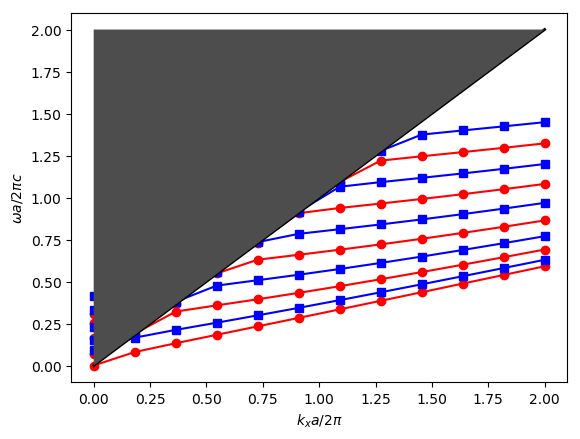

PyObject Text(25,0.5,'$\\omega a / 2\\pi c$')

In [7]:
run(pipeline(`grep tmyoddfreqs: 2dwaveguide.out`, `cut -d, -f2-`, "tmyodd.dat"))
tmyodd, = readcsv("tmyodd.dat", header=true)
ω_tmo = tmyodd[:, 6:end]

plot(kx, ω_tme, "ro-")
plot(kx, ω_tmo, "bs-")
plot(kx, kx, "k-", linewidth=2)
fill([0,2,0],[0,2,2], facecolor=(0.3,0.3,0.3), zorder=3)
xlabel(L"k_x a / 2\pi")
ylabel(L"\omega a / 2\pi c")

### Plotting the fields

MPB can also output the electric and magnetic fields of the eigensolutions.  Because these are potentially large 3d arrays, it only does so if you explicitly request them, and outputs the fields in a standard format called an [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) file, which ends in `.h5`.  A single HDF5 file can contain multiple "datasets", e.g. multiple field components or real+imaginary parts.

In `2dwaveguide.ctl`, we request some field output by a line `(run-tm output-efield-z)` at the end of the file, which performs another computation at the end for a single $k$ point ($k=1$, i.e. $=1\times 2\pi/a$ in MPB's units where $a$ is the arbitrary unit of distance chosen in the `.ctl` file) and outputs $E_z$ for all the bands.

Also, by default, MPB always outputs and HDF5 file containing $\varepsilon$.  It is a good idea to check this file (plot $\varepsilon$) to make sure the structure is what you think it is.  We can use the `h5ls` command-line tool to see what is inside this file:

In [8]:
run(`h5ls "2dwaveguide-epsilon.h5"`)

data                     Dataset {1, 320}
description              Dataset {SCALAR}
epsilon.xx               Dataset {1, 320}
epsilon.xy               Dataset {1, 320}
epsilon.xz               Dataset {1, 320}
epsilon.yy               Dataset {1, 320}
epsilon.yz               Dataset {1, 320}
epsilon.zz               Dataset {1, 320}
epsilon_inverse.xx       Dataset {1, 320}
epsilon_inverse.xy       Dataset {1, 320}
epsilon_inverse.xz       Dataset {1, 320}
epsilon_inverse.yy       Dataset {1, 320}
epsilon_inverse.yz       Dataset {1, 320}
epsilon_inverse.zz       Dataset {1, 320}
lattice\ vectors         Dataset {3, 3}


It actually contains a whole bunch of datasets because MPB in general supports a $3\times3$ anisotropic $\varepsilon$ tensor, and the file contains all of the components of this (symmetric) tensor and its inverse.   However, for the most part we are just interested in `data`, which is a "scalarized" $\varepsilon$ formed from the average eigenvalue of $\varepsilon$.

Any serious technical language or plotting package these days supports HDF5.  In Julia's case, we can read HDF5 through the [HDF5.jl](https://github.com/JuliaLang/HDF5.jl) Juli package, using the `h5read(filename, dataset)` function:

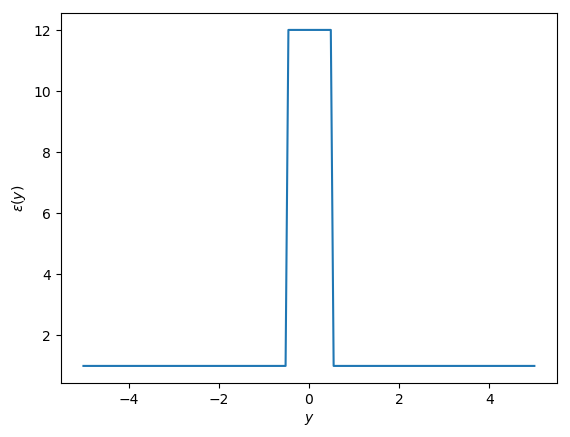

PyObject Text(28,0.5,'$\\varepsilon(y)$')

In [9]:
using HDF5
ɛ = h5read("2dwaveguide-epsilon.h5", "data")
y = linspace(-5,5, length(ɛ))
plot(y, ɛ)
xlabel(L"y")
ylabel(L"\varepsilon(y)")

As expected, $\varepsilon$ is 12 in the middle and 1 elsewhere.  Now let's read the fields.

For example, `2dwaveguide-e.k01.b01.z.tm.h5` contains the electric field (`e`) of the first $k$ point (`k01`) of the first band (`b01`), for the $z$ component (`z`), of TM-polarized (`tm`) fields (i.e. a `run-tm` calculation).  It contains two datasets, `z.r` and `z.i`, which are the real and imaginary parts of the field.  (The phase is chosen essentially at random.)

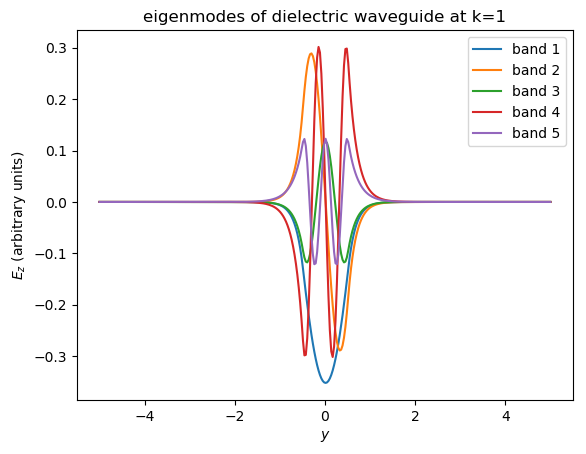

PyObject <matplotlib.legend.Legend object at 0x12b78e690>

In [10]:
# define a little helper function to read the real and imaginary parts into a complex
# array.  Note that the imaginary unit in Julia is "im":
read_z(fname) = h5read(fname, "z.r") + im*h5read(fname, "z.i")

ez1 = read_z("2dwaveguide-e.k01.b01.z.tm.h5")
ez2 = read_z("2dwaveguide-e.k01.b02.z.tm.h5")
ez3 = read_z("2dwaveguide-e.k01.b03.z.tm.h5")
ez4 = read_z("2dwaveguide-e.k01.b04.z.tm.h5")
ez5 = read_z("2dwaveguide-e.k01.b05.z.tm.h5")
plot(y, real(ez1))
plot(y, real(ez2))
plot(y, real(ez3))
plot(y, real(ez4))
plot(y, real(ez5))
title("eigenmodes of dielectric waveguide at k=1")
xlabel(L"y")
ylabel(L"$E_z$ (arbitrary units)")
legend(["band 1", "band 2", "band 3", "band 4", "band 5"])

Let's check that they have the expected orthogonality relationship, i.e. $\int \vec{E}_3^* \cdot \varepsilon \vec{E}_1 \approx 0$:

In [11]:
ez3' * (ɛ .* ez1) / (norm(ez1) * norm(ez3))

1×1 Array{Complex{Float64},2}:
 -2.51324e-15-1.02774e-15im

## 2d periodic waveguide

This is `2dwaveguide-periodic.ctl`, for period-$a$ sequence of dielectric ($\varepsilon=12$) rods of radius $0.2a$ in air.

We run `mpb 2dwaveguide-periodic.ctl > 2dwaveguide-periodic.out` to start with:

In [12]:
run(pipeline(`mpb 2dwaveguide-periodic.ctl`, "2dwaveguide-periodic.out"))

It's always a good idea to read in $\varepsilon$ and plot it as a check, using the `pcolor` function to plot a colormap and `axis("equal")` to use equal scales for the horizontal and vertical axes:

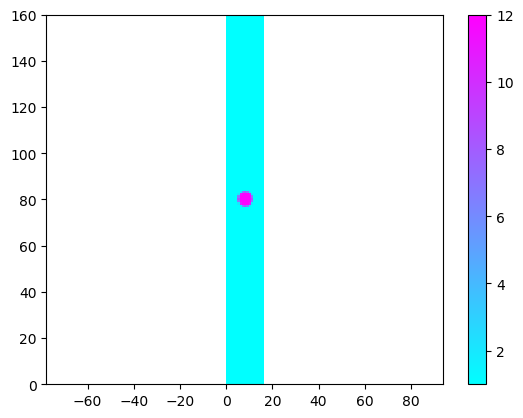

(0.0, 16.0, 0.0, 160.0)

In [13]:
pcolor(h5read("2dwaveguide-periodic-epsilon.h5", "data"), cmap="cool")
colorbar()
axis("equal")

Now that $\varepsilon$ looks good, let's plot the band diagrams.  Normally, we would only compute the band diagram in the first Brillouin zone, or its subset the irreducible Brillouin zone, but for illustration purposes here we compute a couple of unit cells in $k$ to show the periodicity of the band diagram.  As before, we'll use `fill_between` to plot the light cone (which is also periodic) on top.

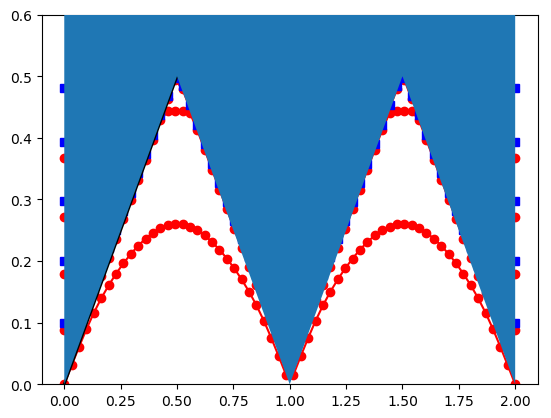

(0, 0.6)

In [14]:
run(pipeline(`grep tmyevenfreqs: 2dwaveguide-periodic.out`, `cut -d, -f2-`, "tmyeven-p.dat"))
run(pipeline(`grep tmyoddfreqs: 2dwaveguide-periodic.out`, `cut -d, -f2-`, "tmyodd-p.dat"))
tmyeven_p, = readcsv("tmyeven-p.dat", header=true)
tmyodd_p, = readcsv("tmyodd-p.dat", header=true)
kx_p = tmyeven_p[:,2]
plot(kx_p, tmyeven_p[:,6:end], "ro-")
plot(kx_p, tmyodd_p[:,6:end], "bs-")
plot(kx_p, kx_p, "k-", linewidth=2)
fill_between([0,0.5,1,1.5,2.0],[0,0.5,0,0.5,0],[1,1,1,1,1], zorder=3)
ylim(0,0.6)

In this case, there are only even-symmetry TM guided bands, and for much of the Brillouin zone there is only a single guided band.  (You will show in homework that at least one guided band is guaranteed analytically in structures such as this.)

Now let's plot the field, which we computed at $k=0.4 \times 2\pi/a$:

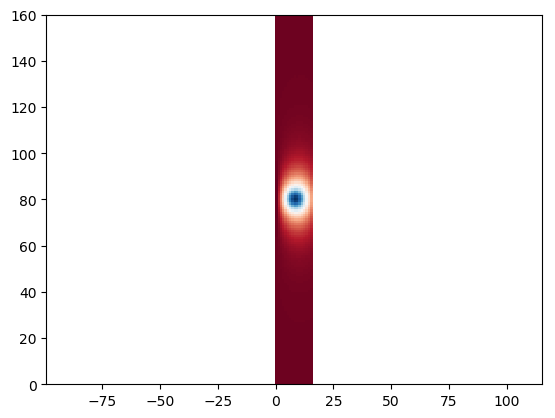

(0.0, 16.0, 0.0, 160.0)

In [15]:
pcolor(h5read("2dwaveguide-periodic-e.k01.b01.z.tm.h5", "z.r"), cmap="RdBu")
axis("equal")

Unfortunately, it's a little hard to make sense of the field if you only look at a single unit cell.  It is a lot clearer if you plot multiple unit cells, multiplying the field by $\exp(i k a)$ as you go from one unit cell to the next.

MPB includes a program `mpb-data` to do just this.  If we run `mpb-data -x 5 fields.h5` on a file `fields.h5` containing the fields, it will make new datasets (suffixed with `-new`) in the file that contain the fields replicated over 20 unit cells with the appropriate phases.  Let's do that here.

We'll also be a little more careful to center the colormap on zero, using `maximum(abs, ez)` to compute the maximum absolute value of the data and then the `vmin/vmax` options to `pcolor` to set the edges of the colormap.  That way, with the `RdBu` colormap, red=negative, blue=positive, and white is zero.

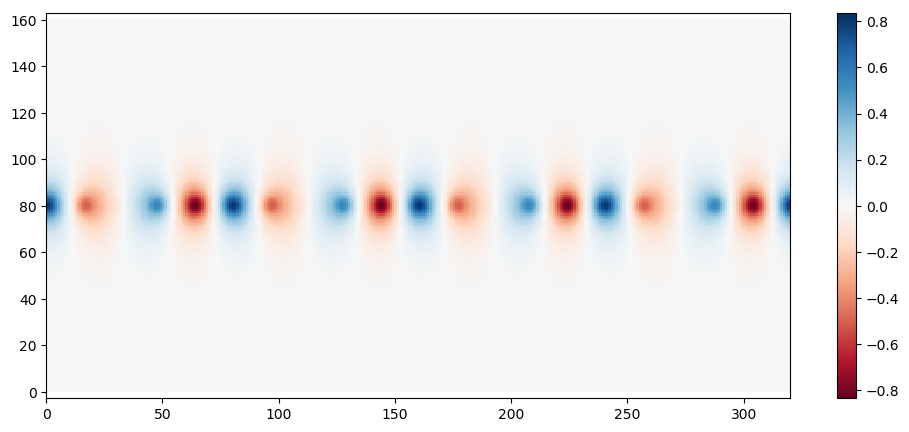

PyObject <matplotlib.colorbar.Colorbar object at 0x12dfeb310>

In [16]:
run(`mpb-data -x 20 2dwaveguide-periodic-e.k01.b01.z.tm.h5`)
ez = h5read("2dwaveguide-periodic-e.k01.b01.z.tm.h5", "z.r-new")
mx = maximum(abs, ez)
figure(figsize=(12,5))
pcolor(ez, cmap="RdBu", vmin=-mx, vmax=mx)
axis("equal")
colorbar()

Now we can see more easily that the fields are oscillating within the waveguide and are exponentially decaying outside the waveguide.